In [146]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [147]:
df = pd.read_csv(r'C:\Users\rksai\OneDrive\Desktop\Telco Customer Churn\data\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [148]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [149]:
df.shape

(7043, 21)

1. CHECKING MISSING VALUES

In [150]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

OBSERVATION: There are no missing values

2. CHECKING DUPLICATES VALUES

In [151]:
df.duplicated().sum()

0

OBSERVATION: There are no duplicate values

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


3. CHECKING NUMBER OF UNIQUE VALUES FOR EACH COLUMN

In [153]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

4. CONVERTING "TotalCharges" INTO NUMERIC

In [154]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [155]:
df['TotalCharges'].isnull().sum()

11

In [156]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [157]:
df['TotalCharges'].isnull().sum()

0

4. UNDERSTANDING THE CHURN DISTRIBUTION

In [158]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Churn Distribution')

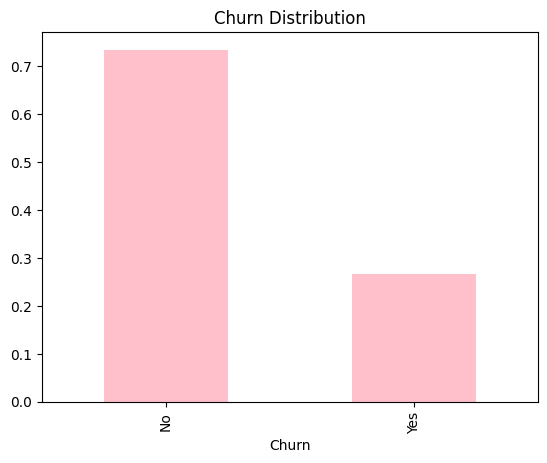

In [159]:
df['Churn'].value_counts(normalize=True).plot(kind='bar', color = 'pink')
plt.title("Churn Distribution")

OBSERVATION: The plot shows that most customers will stay, but a significant minority might churn (27%)

5. ANALYZING THE NUMERICAL COLUMNS

In [160]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


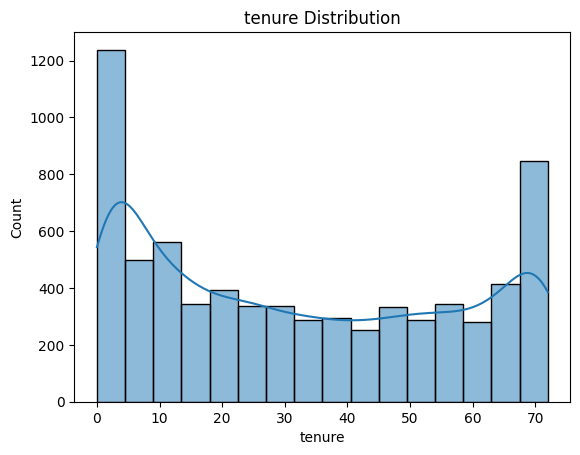

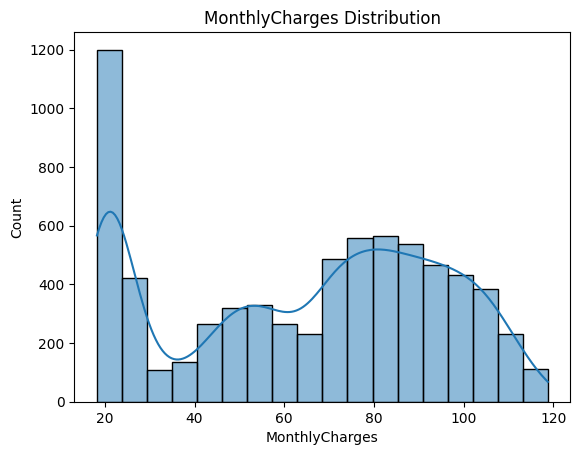

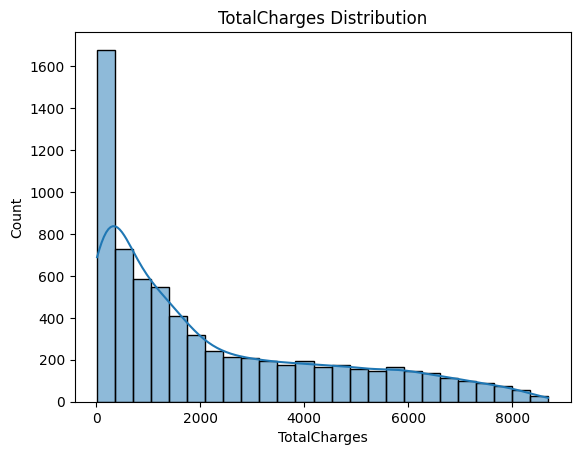

In [161]:
numerical_cols  = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numerical_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.show()

OBSERVATION: Tenure
1. Many customers have very low tenure (0–12 months).
2. Smaller groups of customers are spread across longer tenures, up to 72 months.
3. Most churn happens in early months (new customers are more likely to leave quickly). Long-tenure customers are more loyal.

OBSERVATION: Monthly charges
1. Most customers use low-charge services. It means they use fewer services.
2. High-charge customers subscribe to multiple services. It has a peak between 70-90.

OBSERVATION: Total charges
1. It strongly correlates with tenure and monthly charges.
2. Most of the customers have low TotalCharges. They are mostly new customers which leads to higher churn.

6. ANALYZING THE CATEGORICAL COLUMNS

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [163]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'O' and col not in ['customerID']]
categorical_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

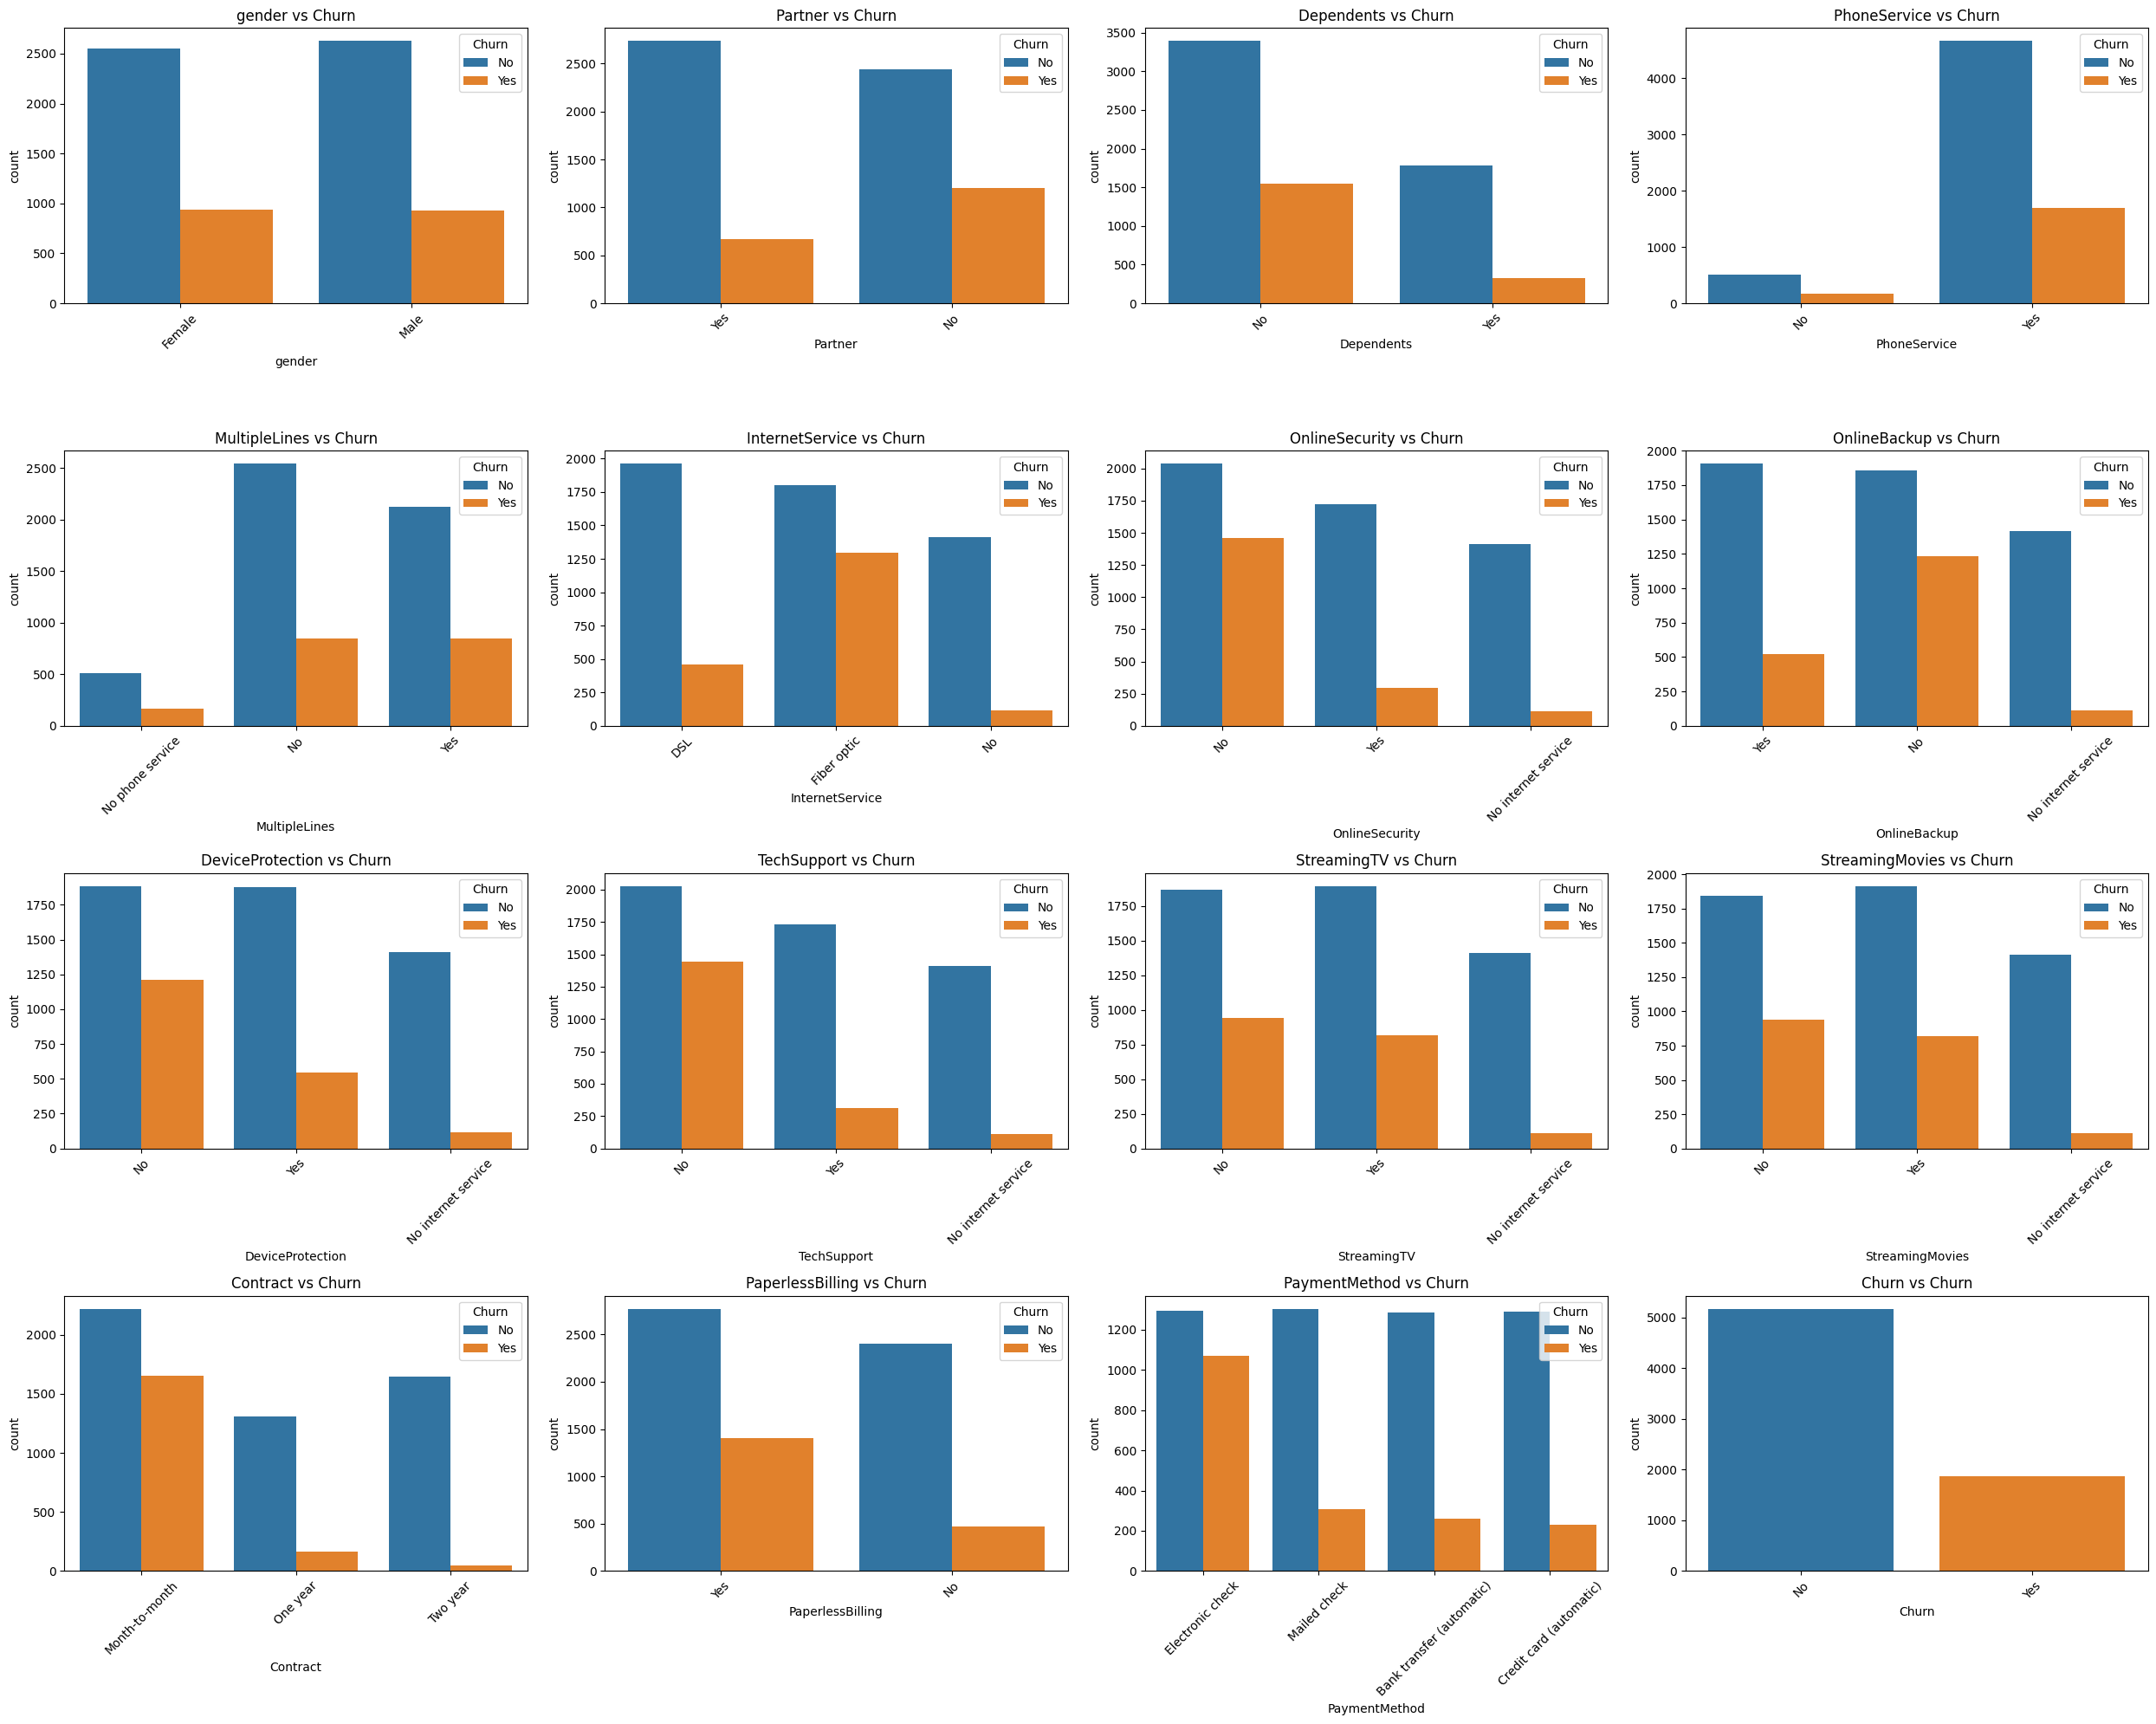

In [164]:
fig, axes = plt.subplots(4, 4, figsize=(25, 20))
axes = axes.flatten() 

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue="Churn", ax=axes[i])
    axes[i].set_title(f"{col} vs Churn")
    axes[i].tick_params(axis='x', rotation=45)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

OBSERVATION:
1. Churn rates are almost identical for male and female.
2. Customers without partners or without dependents have higher churn.
3. Not much difference in churn rates between having single/multiple lines.
4. Customers with Fiber optic internet show the highest churn rate while DSL customers churn less.
5. Customers with No Internet churn the least (because they probably use fewer services and pay less).
6. For OnlineSecurity, OnlineBackup, TechSupport, DeviceProtection, customers with “No” in these features churn much more.
7. Month-to-month contracts have the highest churn rate and One year / Two year contracts have much lower churn.
8. Customers with PaperlessBilling = Yes have higher churn.
9. Electronic check customers churn the most.
10. Customers paying via credit card, bank transfer, or mailed checks churn less.

Text(0.5, 1.0, 'Correlation Heatmap')

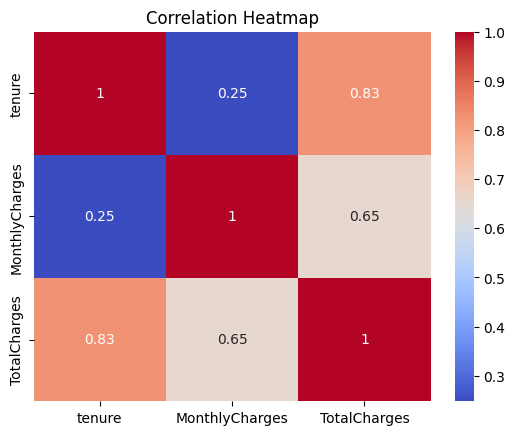

In [165]:
num_corr = df[numerical_cols].corr()

sns.heatmap(num_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

Key Insights

1. Demographic churn drivers: senior citizens, gender may have slight effect.
2. Behavioral churn drivers: month-to-month contract, no online security, high monthly charges.
3. Tenure effect: shorter tenure = higher churn.
4. TotalCharges: strongly correlated with tenure × monthly charges.